In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing the data and overview 

train_df= pd.read_csv('Titanic-Dataset.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df['Survived'].value_counts()

# survived = 1
# didn't survive = 0

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
sns.countplot(data=train_df, x='Survived')

# survived = 1
# didn't survive = 0

<Axes: xlabel='Survived', ylabel='count'>

<AxesSubplot:>

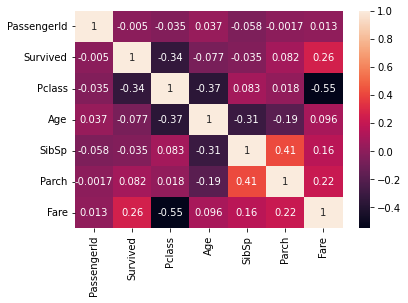

In [10]:
sns.heatmap(train_df.corr(), annot=True)

In [10]:
#Data preparation
#looking for null values and taking care of them

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# fill the nans in "Age" with "mean" 
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())


In [12]:
print(train_df['Age'].isnull().sum())


0


In [13]:
# deal with categorical data in "Sex" col (hint: do some encoding or replace the object values with int)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])


#"male" هيتحول لـ 0

#"female" هيتحول لـ 1

In [14]:
print(train_df['Sex'].head())


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32


In [15]:
train_df.drop(['Name', 'PassengerId', 'Fare', 'Ticket','Embarked', 'Cabin'], axis = 1, inplace = True)

In [16]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [17]:
missing=train_df.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [18]:
#defining features and the label

X= train_df.drop('Survived', axis=1)
y= train_df['Survived']

In [19]:
#spliting the dataset to work on train and test


from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#feature scaling
from sklearn.preprocessing import StandardScaler

# تقييس الميزات باستخدام StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [21]:
#training the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# إنشاء نموذج الانحدار اللوجستي
model = LogisticRegression()

# تدريب النموذج باستخدام بيانات التدريب
model.fit(X_train_scaled, y_train)

# التنبؤ بالنتائج باستخدام بيانات الاختبار
y_pred = model.predict(X_test_scaled)

# حساب دقة النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.12%


In [22]:
#predicting test

# التنبؤ بالنتائج باستخدام بيانات الاختبار
y_test_pred = model.predict(X_test_scaled)

# عرض التنبؤات
print(y_test_pred)


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


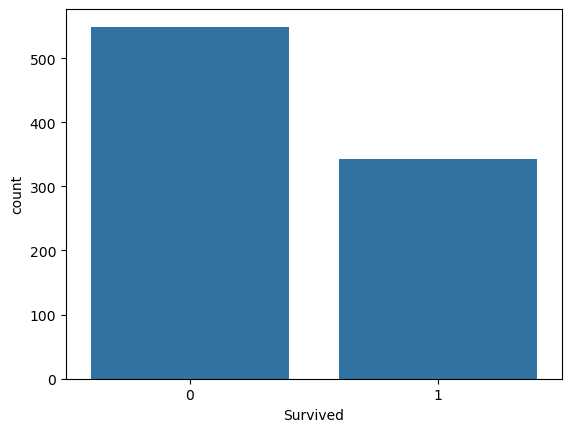

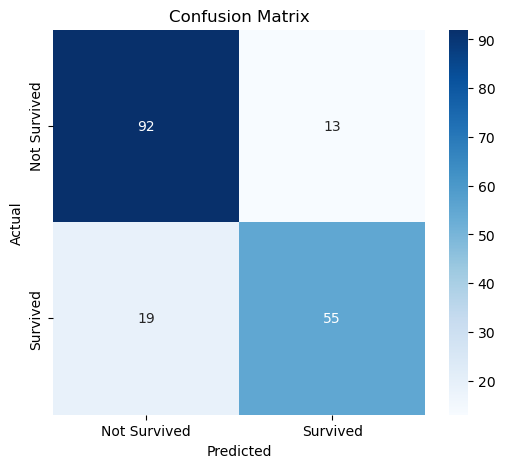

In [23]:
#applaing the confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_test_pred)

# رسم مصفوفة الالتباس باستخدام seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
#print the classification_report

from sklearn.metrics import classification_report

# حساب تقرير التصنيف
report = classification_report(y_test, y_test_pred)

# طباعة تقرير التصنيف
print(report)


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [25]:
#Hyperparameters
# train the model after applaying the GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# إعداد الهايبر باراميترز التي سيتم تجربتها
param_grid = {
    'C': [0.1, 1, 10],  # قيم مختلفة لـ C
    'penalty': ['l2'],   # نوع الانتظام
    'solver': ['liblinear', 'saga'],  # الخوارزميات المختلفة
    'max_iter': [100, 200, 300]  # عدد التكرارات
}

# إنشاء النموذج الانحداري اللوجستي
logreg = LogisticRegression()

# إعداد GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# تدريب النموذج باستخدام GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# عرض أفضل هايبر باراميترز
print("Best Hyperparameters: ", grid_search.best_params_)

# استخدام أفضل نموذج لتنبؤ النتائج
best_model = grid_search.best_estimator_

# حساب الدقة للنموذج الأفضل
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")




Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Model Accuracy: 79.33%


In [27]:
# print the best estimator (best model)
# طباعة النموذج الأفضل
print("Best Estimator (Best Model):")
print(grid_search.best_estimator_)


Best Estimator (Best Model):
LogisticRegression(C=0.1, solver='saga')


In [28]:
# print the best params
# طباعة أفضل الهايبر باراميترز
print("Best Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [29]:
# use the model for predection

# استخدام النموذج الأفضل (best_estimator_) للتنبؤ على مجموعة الاختبار
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# عرض النتائج (أو يمكنك استخدام دوال مثل accuracy_score)
from sklearn.metrics import accuracy_score

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")


Prediction Accuracy: 79.33%


Confusion Matrix:
[[91 14]
 [23 51]]


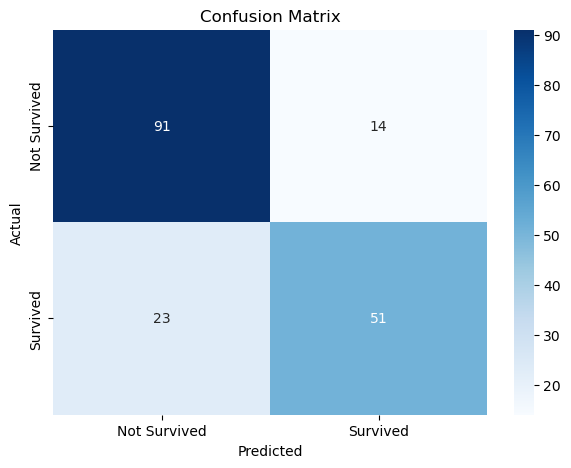

In [30]:
# print the confusion_matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)

# طباعة مصفوفة الالتباس
print("Confusion Matrix:")
print(cm)

# رسم مصفوفة الالتباس باستخدام heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
#print the classification_report
from sklearn.metrics import classification_report

# حساب تقرير التصنيف
report = classification_report(y_test, y_pred)

# طباعة تقرير التصنيف
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

